## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading Data 
#### Movie Data Set which has the movies data till 2016

In [2]:
df = pd.read_csv( r"movie_metadata.csv" )
df.head() 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Checking the shape of the dataframe

In [3]:
df.shape

(5043, 28)

Getting list of all the columns in the dataset

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Checking for unnecessary Null values

In [5]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## Visualizing Null values in dataset

<AxesSubplot: >

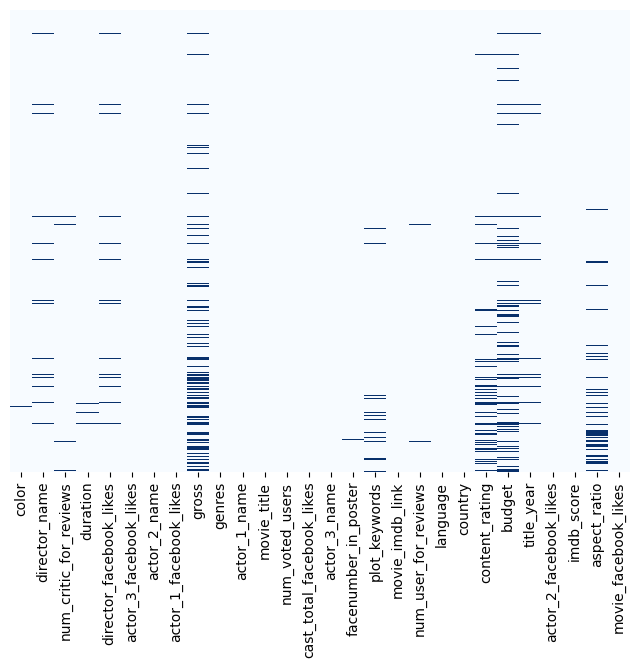

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

## Visualizing Year wise count of the data

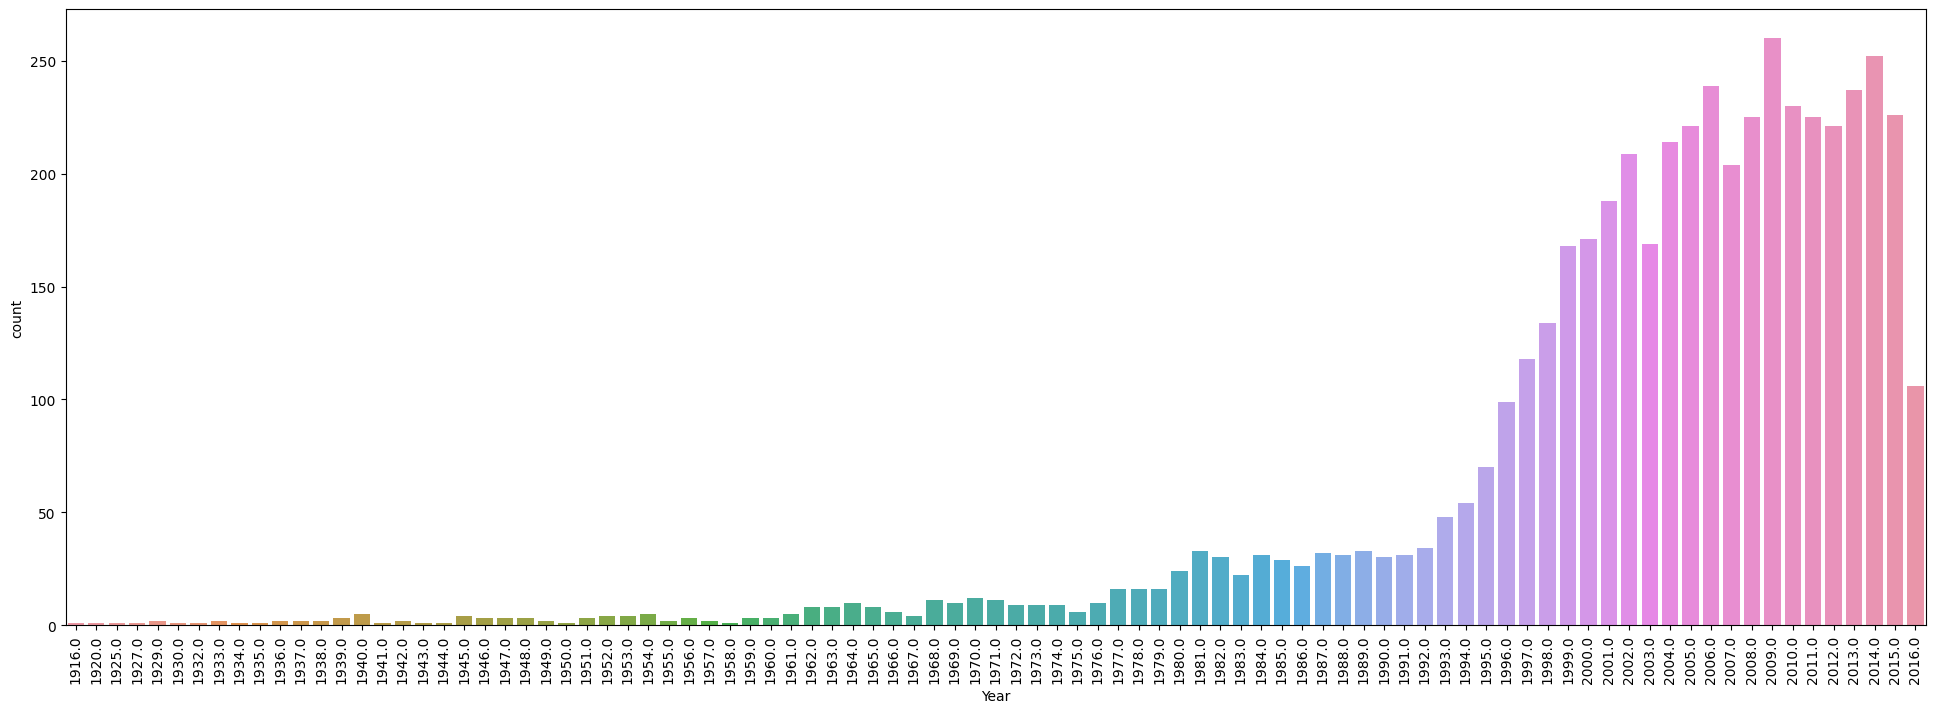

In [7]:
_, ax = plt.subplots(figsize=(24, 8))
sns.countplot(x=df['title_year'].astype('category'), ax=ax)
plt.xlabel('Year')
_ = plt.xticks(rotation=90)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\2449963512.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.title_year)


<AxesSubplot: xlabel='title_year', ylabel='Density'>

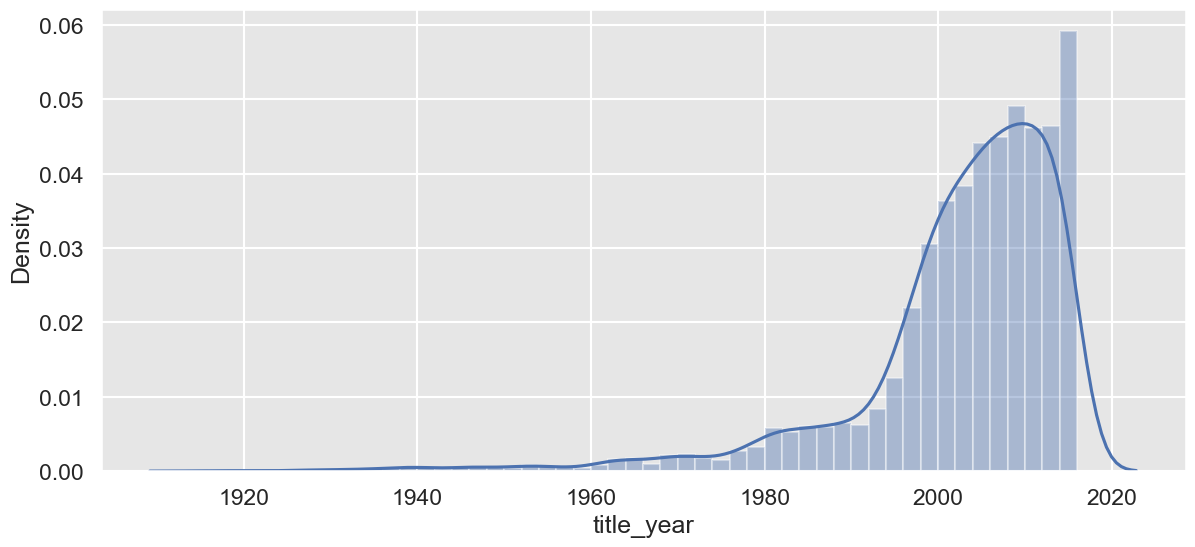

In [8]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #sns.axes_style("whitegrid")

sns.distplot(df.title_year)

(1960.0, 2020.0)

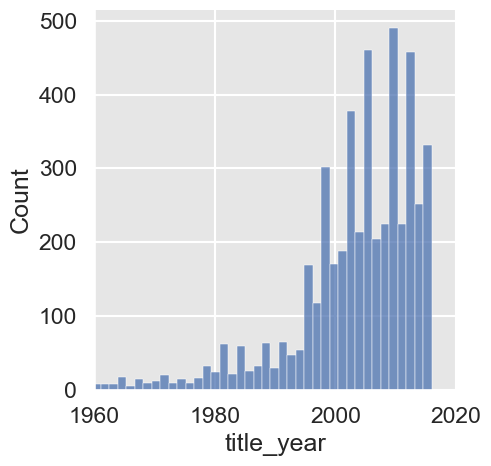

In [9]:
sns.displot(df.title_year)
plt.xlim(1960, 2020)

## Visualizing Correlation of dataset features

### Label Encoding Categorical Features (textual data)
Categorical columns are label encoded and combined with numerical features in dataframe df2.

In [10]:
df_encoded = df
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
df_encoded[cat_list]=df_encoded[cat_list].apply(lambda x:le.fit_transform(x))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3368390882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_encoded.corr()


<AxesSubplot: >

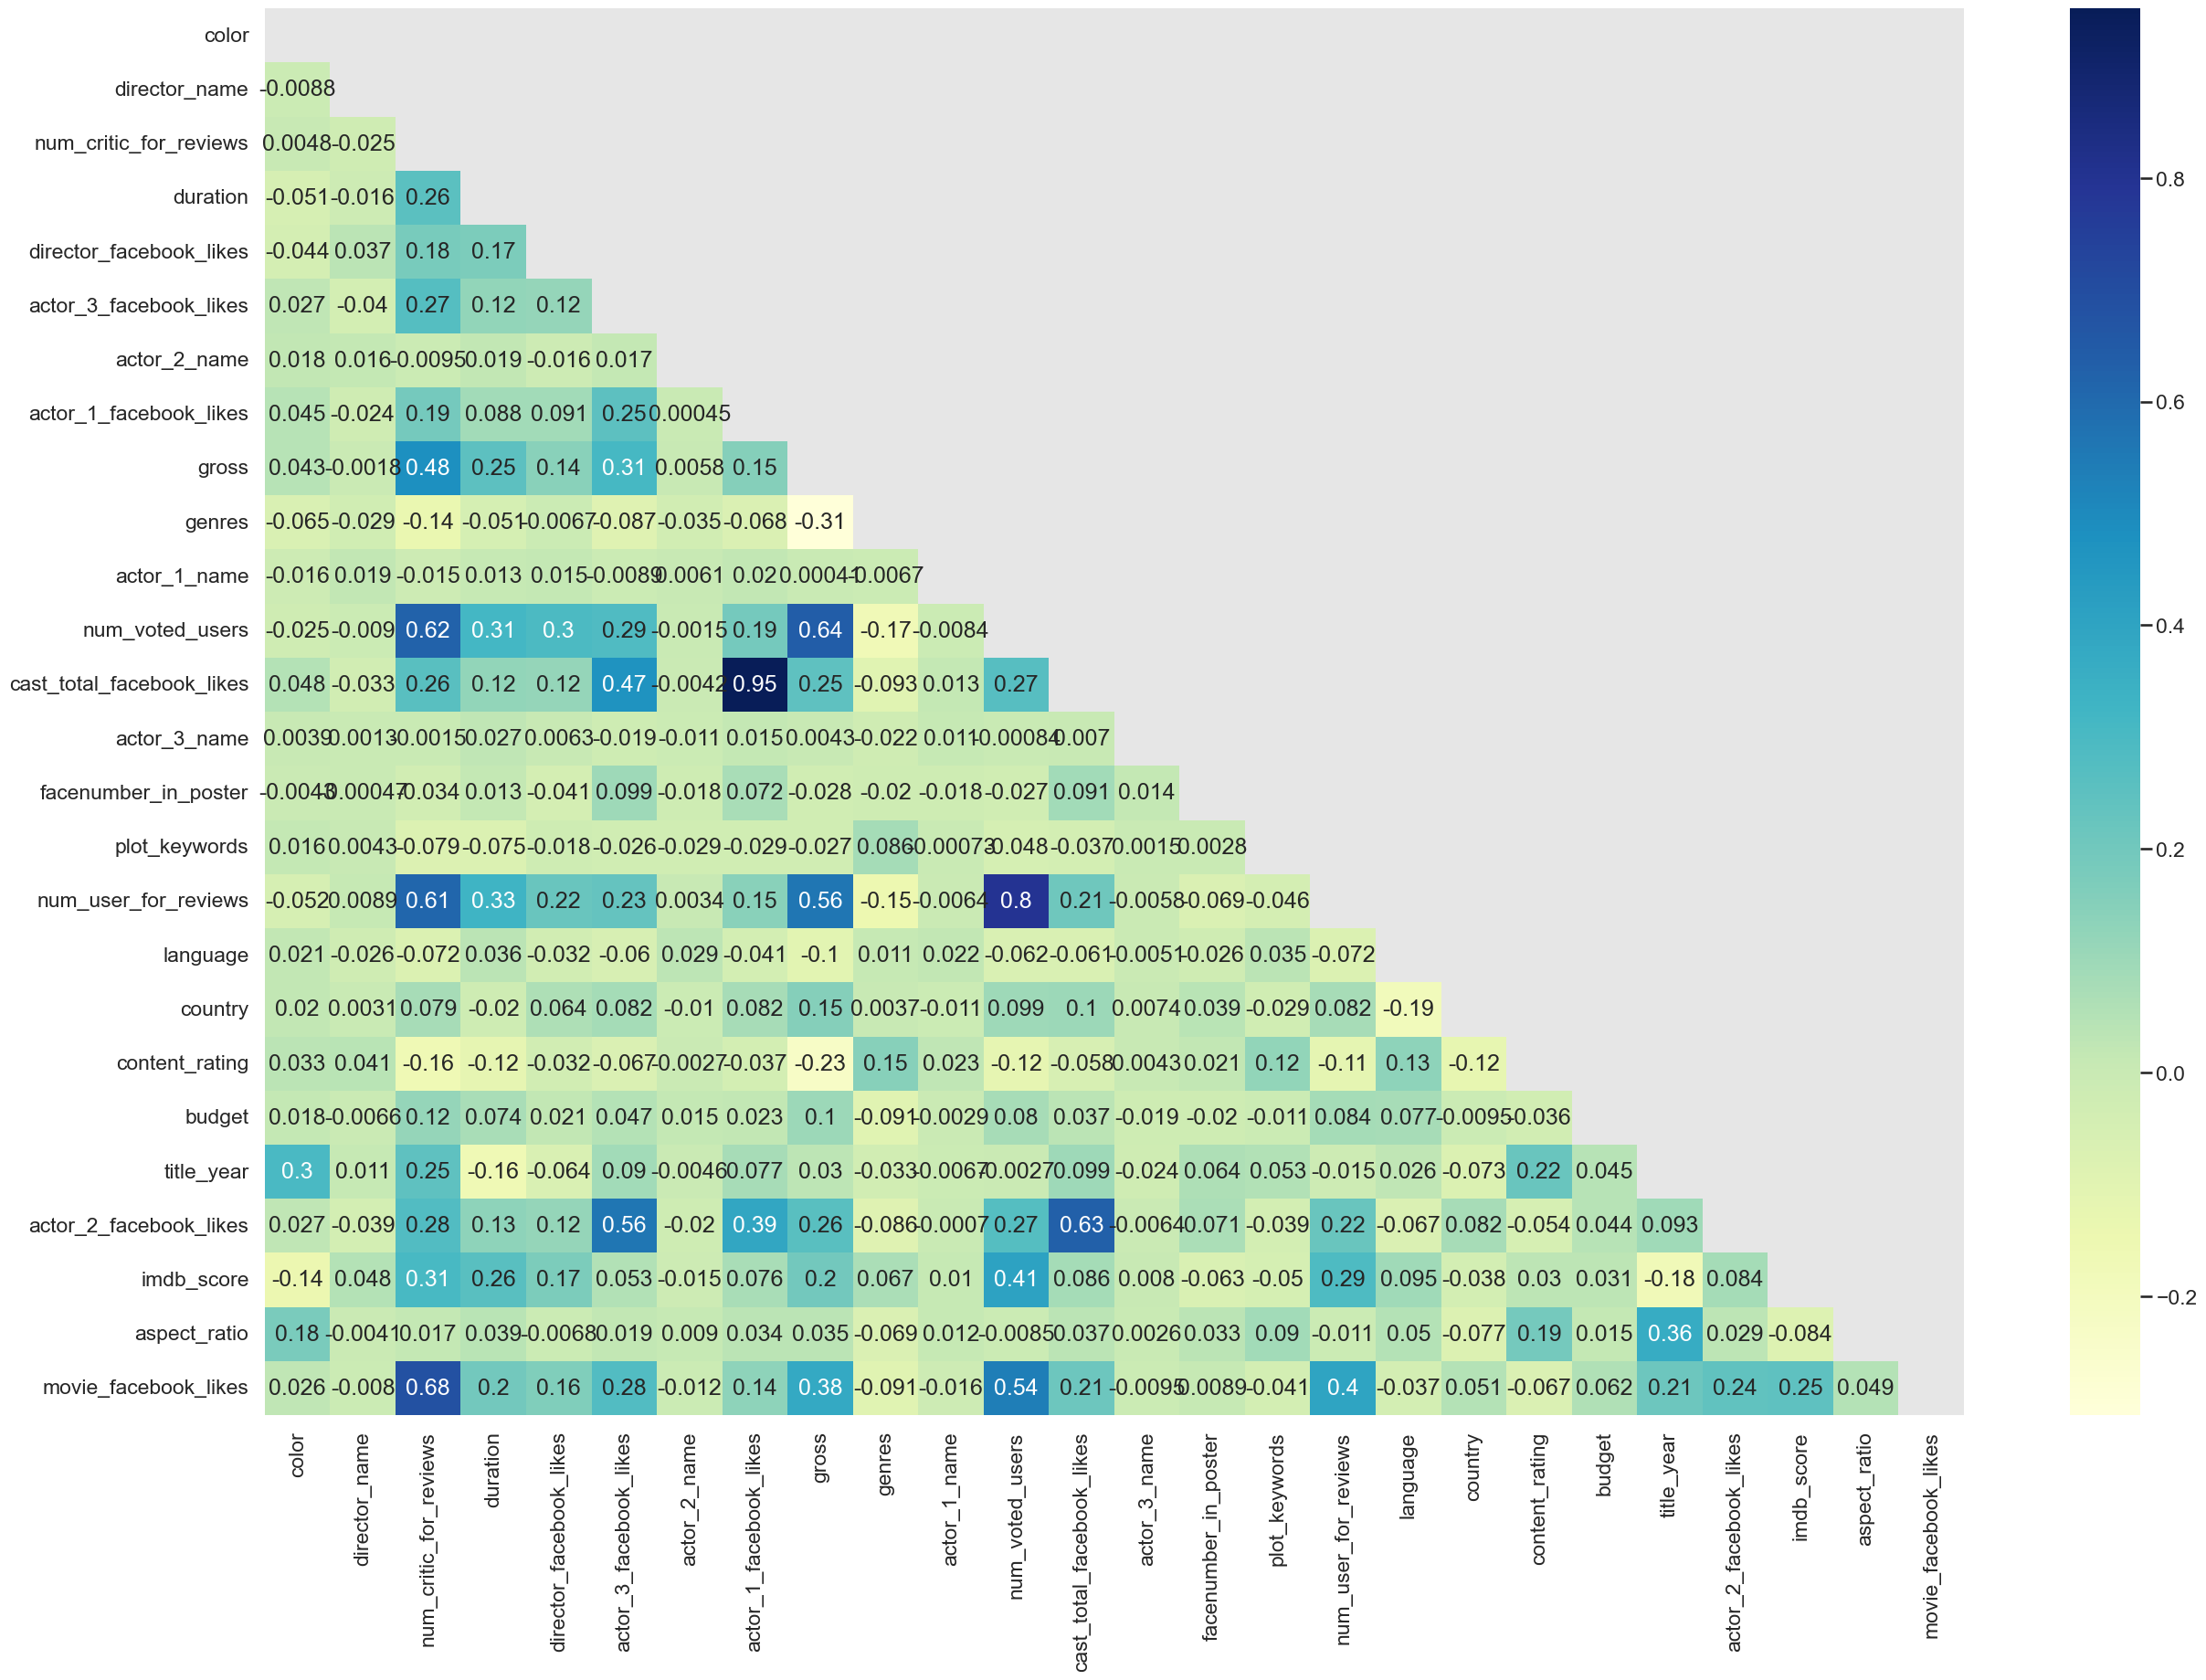

In [11]:
corr = df_encoded.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(30,20))
sns.set_style("white", {'axes.grid' : False})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap="YlGnBu",annot=True,mask = mask)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

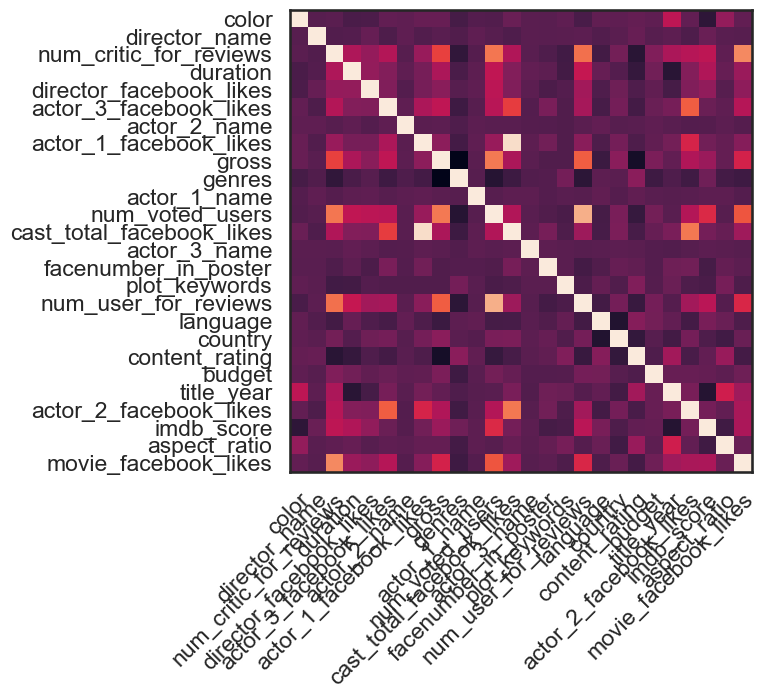

In [12]:
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

## Visualization - Genres

In [13]:
df = pd.read_csv( r"movie_metadata.csv" )
df['genre_split'] = df.genres.str.split('|')
df.head() 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genre_split
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,"[Action, Adventure, Fantasy, Sci-Fi]"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,"[Action, Adventure, Fantasy]"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,"[Action, Adventure, Thriller]"
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,"[Action, Thriller]"
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,[Documentary]


In [14]:
def genreSplit(x):
    genre1 = []
    st = ''
    for i in x:
        genre1.append(i)
        break
    return (st.join(genre1)) 

In [15]:
df['genre1'] = df['genre_split'].map(lambda x: genreSplit(x))
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genre_split,genre1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,"[Action, Adventure, Fantasy, Sci-Fi]",Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,"[Action, Adventure, Fantasy]",Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,"[Action, Adventure, Thriller]",Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,"[Action, Thriller]",Action
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,[Documentary],Documentary


(-2.0, 10.0)

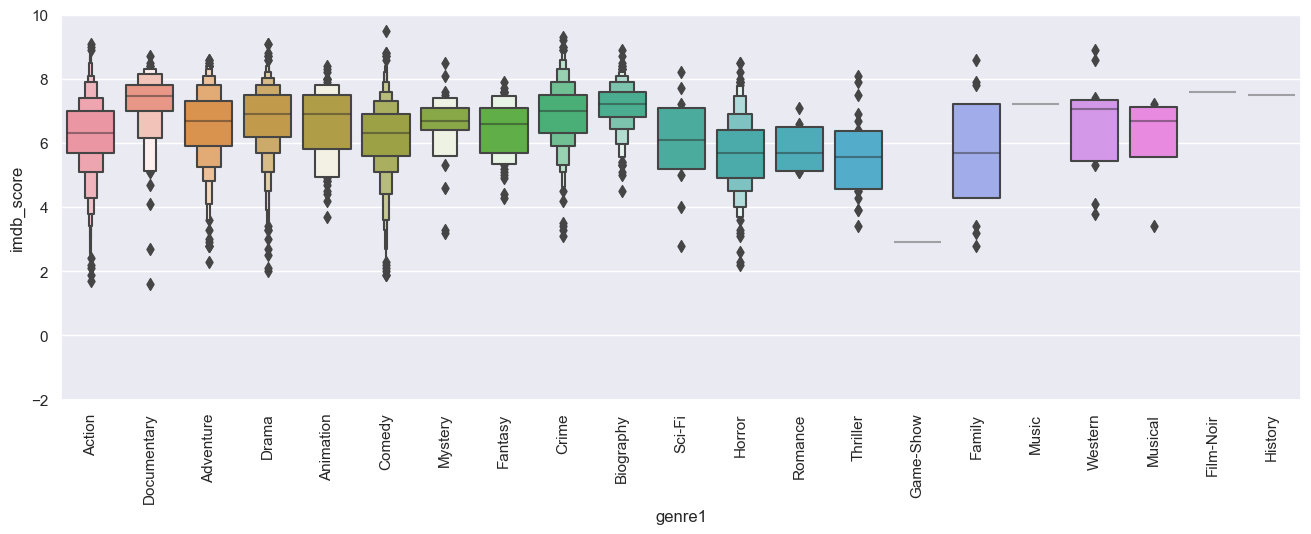

In [16]:
sns.set(rc={'figure.figsize':(16, 5)})
#sns.set_context("talk")
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxenplot(x=df.genre1, y=df.imdb_score, data=df)
plt.xticks(rotation=90)
plt.ylim(-2, 10)

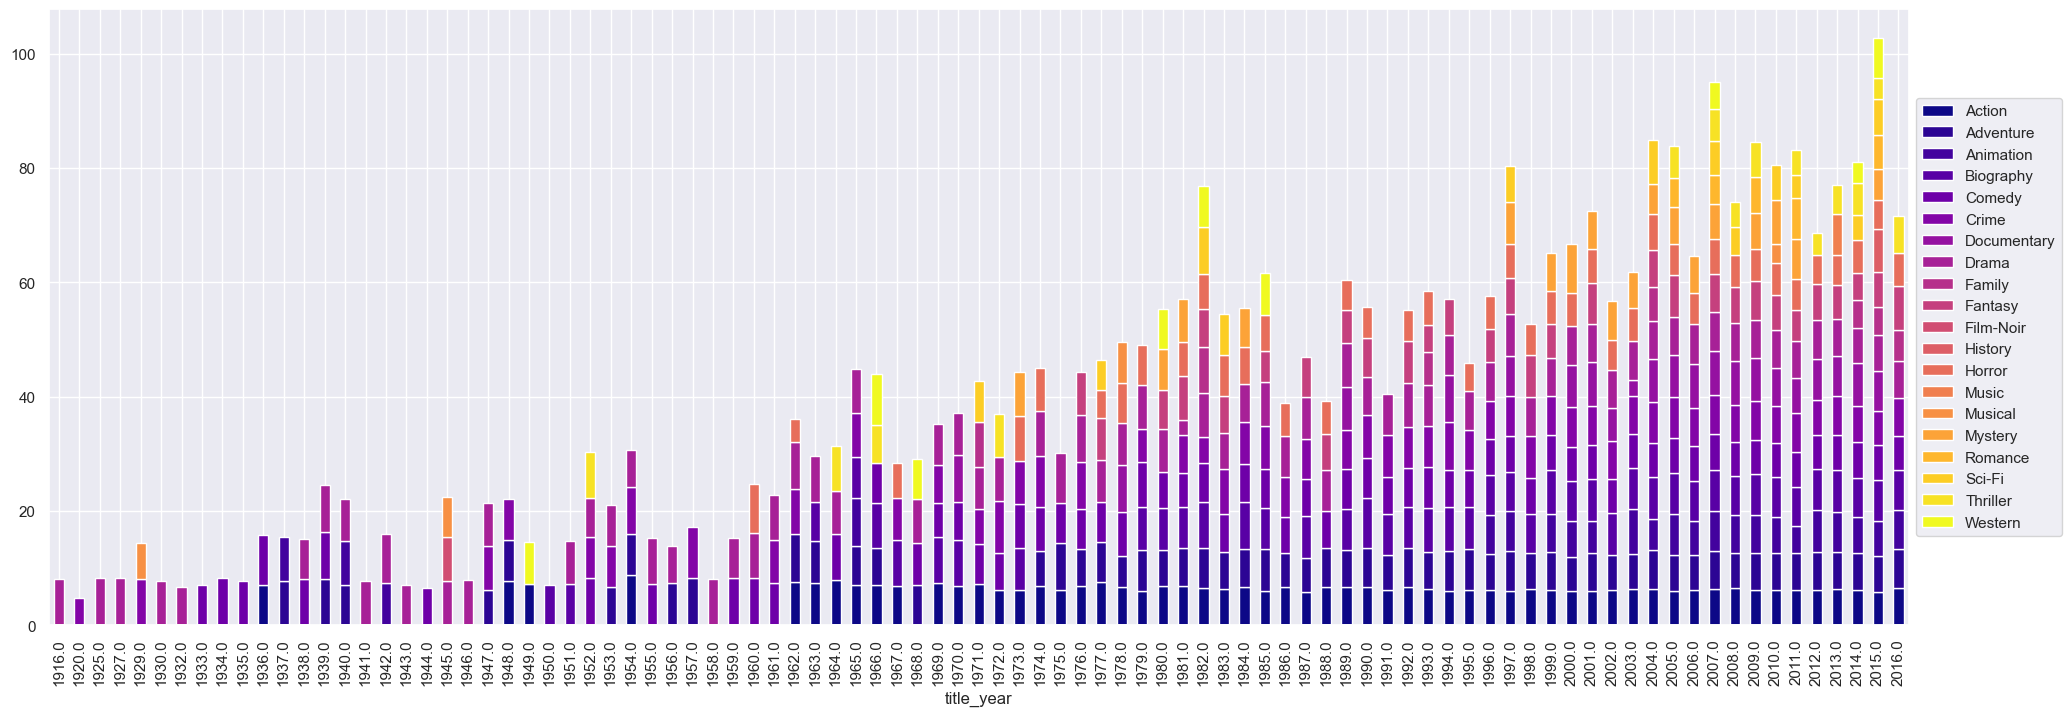

In [17]:
sns.set(rc={'figure.figsize':(24, 8)})
#sns.set_context("talk")
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

df_pivot = pd.pivot_table(df, index='title_year', columns='genre1', values='imdb_score')
df_pivot.plot.bar(stacked=True, colormap='plasma')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Visualization: IMDB Score - Duration Correlation

<AxesSubplot: xlabel='imdb_score', ylabel='duration'>

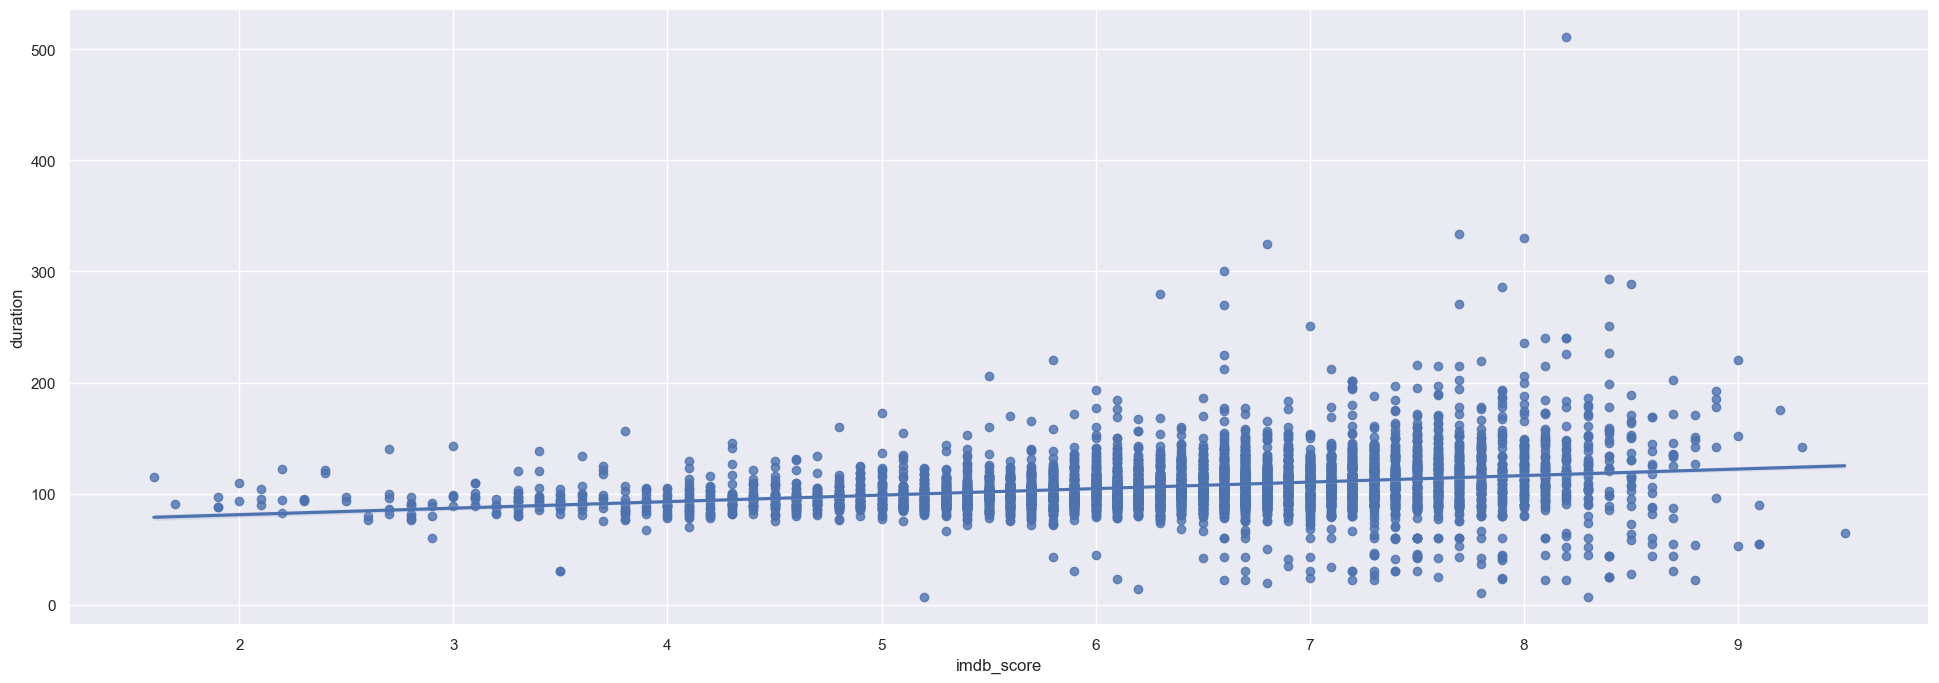

In [18]:
sns.regplot(y='duration', x='imdb_score', data=df)

In [19]:
runtime_bin_edges = [60, 90, 120, 180, 240]
runtime_bin_names = ['Short', 'Medium', 'Long', 'Significantly Long']
df['Runtime_bins'] = pd.cut(df['duration'], runtime_bin_edges, labels=runtime_bin_names)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genre_split,genre1,Runtime_bins
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Long
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,"[Action, Adventure, Fantasy]",Action,Long
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,"[Action, Adventure, Thriller]",Action,Long
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,"[Action, Thriller]",Action,Long
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,[Documentary],Documentary,NaN


In [20]:
df['Runtime_bins'].value_counts()

Medium                3008
Long                  1001
Short                  844
Significantly Long      53
Name: Runtime_bins, dtype: int64

c:\Users\abhij\Downloads\ADS_Project\ADS_Project\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\abhij\Downloads\ADS_Project\ADS_Project\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\abhij\Downloads\ADS_Project\ADS_Project\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\abhij\Downloads\ADS_Project\ADS_Project\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated

Text(0.5, 1.0, 'Runtime distribution using FacetGrid')

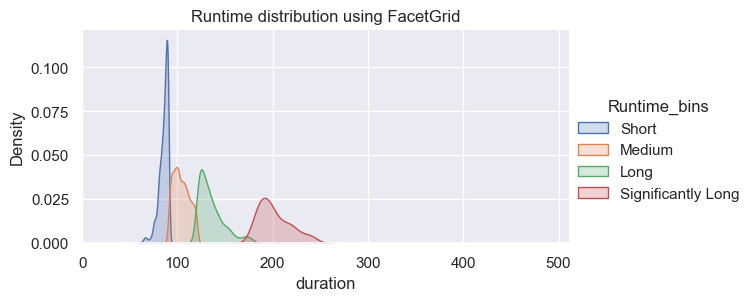

In [21]:
as_fig = sns.FacetGrid(df,hue='Runtime_bins',aspect=2)

as_fig.map(sns.kdeplot,'duration',shade=True)

oldest = df['duration'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

plt.title('Runtime distribution using FacetGrid')

In [22]:
rating_bin_edges = [0, 5, 6.9, 7.5, 10]
rating_bin_names = ['Poor', 'Okay', 'Good', 'Very Good']
df['Rating_bins'] = pd.cut(df['imdb_score'], rating_bin_edges, labels=rating_bin_names)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genre_split,genre1,Runtime_bins,Rating_bins
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Long,Very Good
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0,"[Action, Adventure, Fantasy]",Action,Long,Good
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,"[Action, Adventure, Thriller]",Action,Long,Okay
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,"[Action, Thriller]",Action,Long,Very Good
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,12.0,7.1,NaN,0,[Documentary],Documentary,NaN,Good


C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\13273427.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Rating_bins", y="gross", palette='gnuplot', data=df)


<AxesSubplot: xlabel='Rating_bins', ylabel='gross'>

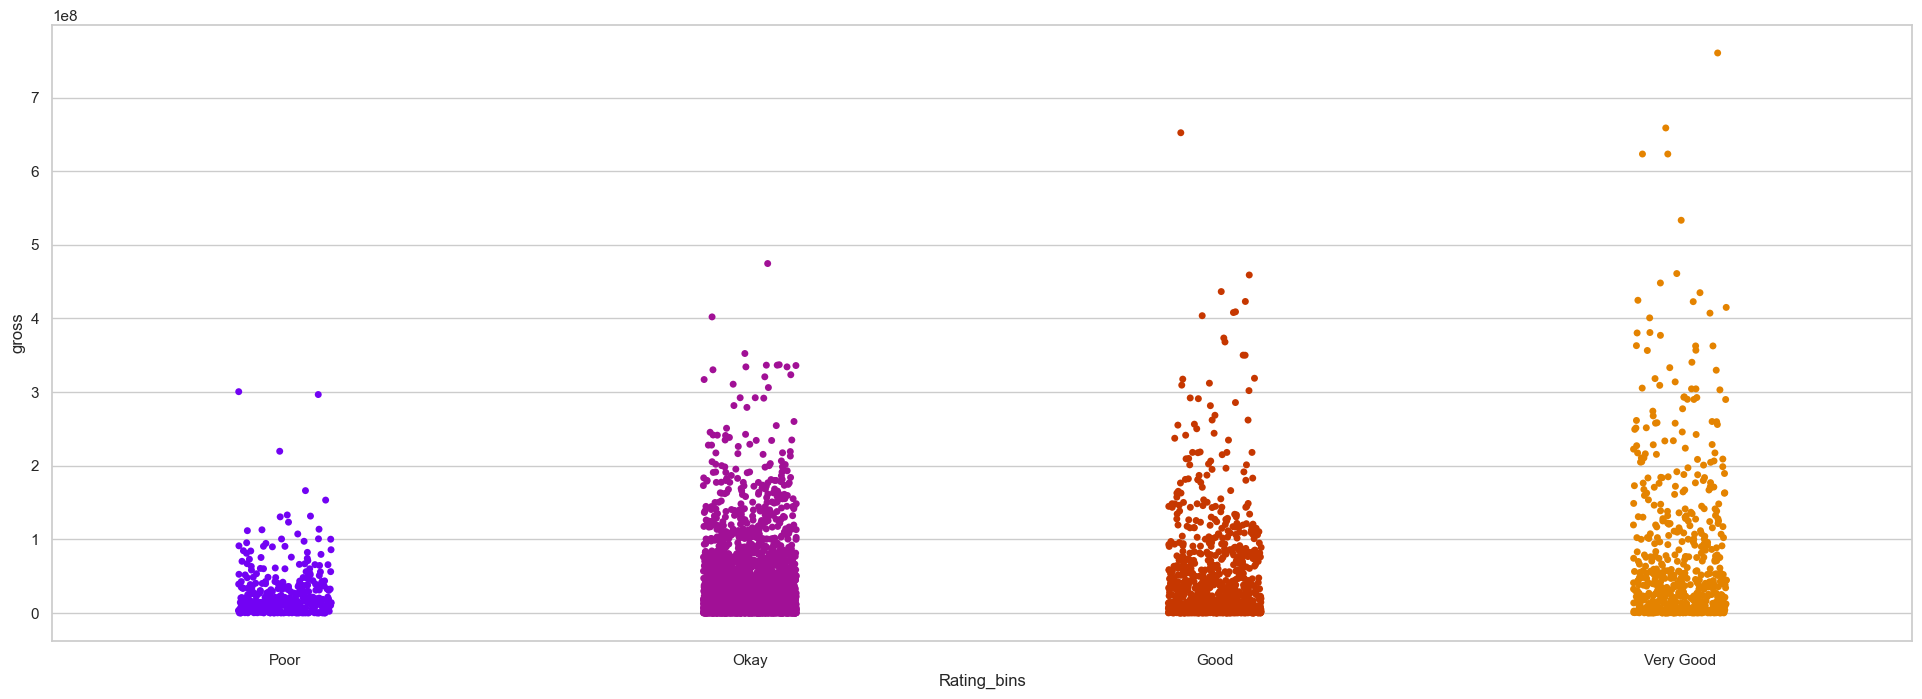

In [23]:
sns.set(style="whitegrid", palette="muted")
pd.melt(df, "Rating_bins")
sns.stripplot(x="Rating_bins", y="gross", palette='gnuplot', data=df)

Reading more metadata files to merge with the dataset

In [24]:
df = pd.read_csv( r"movie_metadata.csv" )
df.head() 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [25]:
data = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [26]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


### Data Cleaning and Preprocessing

In [27]:
#replacing Null values in name columns with 'unknown'
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [28]:
#separating genres in same fiels with space instead of |
data['genres'] = data['genres'].str.replace('|', ' ')

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3793839226.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genres'] = data['genres'].str.replace('|', ' ')


In [29]:
#checking how thw data looks after preprocessing
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [30]:
# converting all strings within titles to lower
data['movie_title'] = data['movie_title'].str.lower()

In [31]:
#verifying previous code has run correctly
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [32]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [33]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

## Uploading Data related to Credit of Movies from Kaggle

In [34]:
credits = pd.read_csv('credits.csv')

In [35]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [36]:
meta = pd.read_csv('movies_metadata.csv')

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\2048473160.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('movies_metadata.csv')


In [37]:
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [38]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [39]:
meta['year'] = meta['release_date'].dt.year

In [40]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [41]:
#taking relevant columns for our project
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [42]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [43]:
#converting id to int to make merging and joining easier
new_meta['id'] = new_meta['id'].astype(int)

In [44]:
data = pd.merge(new_meta, credits, on='id')

In [45]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


### Creating functions to get genres, actors and directors after splitting using the space inserted earlier

In [46]:
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [47]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [48]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [49]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [50]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [51]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [52]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [53]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [54]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [55]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [56]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [57]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [58]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [59]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [60]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [61]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [62]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [63]:
#checking for Nulls
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [64]:
#dropping the null fiels as they are useless for our system
movie = movie.dropna(how='any')

In [65]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [66]:
#renaming columns
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [67]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [68]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [69]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [70]:
data

,genres,id,title,year,cast,crew,genres_list,actor_1_name,actor_2_name,actor_3_name,director_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ...",Adventure Action Fantasy Comedy,Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ...",Action Adventure Fantasy Sci-Fi,Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge...",Action Adventure Fantasy Sci-Fi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Taika Waititi
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend...",Action Adventure Comedy Sci-Fi,Chris Pratt,Zoe Saldana,Dave Bautista,James Gunn
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '...",Fantasy Action Adventure,Pierce Brosnan,William Hurt,Benjamin Walker,Sean McNamara
...,...,...,...,...,...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '...",Romance Comedy,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Hannaleena Hauru
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge...",Crime Comedy Action Family,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Jonathan A. Rosenbaum
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend...",Family Animation Romance Comedy,NaN,NaN,NaN,Beth David Esteban Bravo
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend...",Crime Drama Thriller,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Ravi Udyawar


In [71]:
old = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [72]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [73]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [74]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy|Drama
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,NaN
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama|Horror|...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy|Drama|Romance


In [75]:
new = old.append(movie)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3034453481.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = old.append(movie)


In [76]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [77]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [78]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


### Extracting features of 2018 movies from Wikipedia

In [79]:
import lxml

In [80]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [81]:
df_new = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\4282714249.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)


In [82]:
df_new

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],NaN
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],NaN
2,J A N U A R Y,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],NaN
3,J A N U A R Y,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],NaN
4,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],NaN
...,...,...,...,...,...,...,...
269,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",NaN,[164]
270,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",NaN,[137]
271,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",NaN,[229]
272,D E C E M B E R,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",NaN,[262]


In [83]:
#!pip install TMDb
#!pip install tmdbv3api


Installing and importing Tmdb to get relevant data about movieID and Genre using the popular Tmdb database which is used by many sites to populate their movie metadata.

In [84]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '5492165c61b1a21c06eb3a3b578a6339'

In [85]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

Mapping the Genres to the new Dataframe

In [86]:
df_new['genres'] = df_new['Title'].map(lambda x: get_genre(str(x)))

In [87]:
df_new

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],NaN,Horror Mystery Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],NaN,Thriller Drama
2,J A N U A R Y,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],NaN,Action Thriller
3,J A N U A R Y,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],NaN,Drama History Western
4,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],NaN,Action Thriller Mystery
...,...,...,...,...,...,...,...,...
269,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",NaN,[164],Mystery Adventure Comedy Crime
270,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",NaN,[137],Thriller Science Fiction Action Adventure
271,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",NaN,[229],Drama History
272,D E C E M B E R,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",NaN,[262],Documentary


Taking relevant columns

In [88]:
df_2018 = df_new[['Title','Cast and crew','genres']]

In [89]:
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller Mystery
...,...,...,...
269,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime
270,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure
271,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History
272,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Documentary


Writing functions to get cast and crew information for separate columns

In [90]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

Mapping directors to the dataframe

In [91]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\930721595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [92]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

Mapping the actors to the dataframe

In [93]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\2274966287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


Populating Year column in Year format using release data column

In [94]:
meta['year'] = meta['release_date'].dt.year

In [95]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [96]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3672495884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [97]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [98]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\2517195254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


Overview of the prepared dataframe

In [99]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
269,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
270,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
271,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
272,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Documentary,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


Renaming columns for easier merge operation

In [100]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [101]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [102]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
...,...,...,...,...,...,...
269,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
270,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
271,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
272,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Documentary,Destroyer


replacing Null values within actors as unknown

In [103]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [104]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

Combining the data

In [105]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [106]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thr...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
...,...,...,...,...,...,...,...
269,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure C...
270,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Ficti...
271,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History
272,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Documentary,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Karyn Kusama Documentary


### Extracting features of 2019 movies from Wikipedia

In [107]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [108]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\1752420719.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)


In [109]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
240,D E C E M B E R,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[132]
241,D E C E M B E R,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[224]
242,D E C E M B E R,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[225]
243,D E C E M B E R,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[226]


In [110]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [111]:
df_2019 = df[['Title','Cast and crew','genres']]

In [112]:
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Horror Thriller Mystery
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Thriller Drama Action Crime
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Comedy Drama
...,...,...,...
240,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Animation Action Adventure Comedy Family
241,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama Romance History
242,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,War Drama Action History
243,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama Crime History


In [113]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [114]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\203239715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


In [115]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [116]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\1562076556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [117]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [118]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3736213850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [119]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [120]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [121]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [122]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [123]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [124]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [125]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [126]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
240,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
241,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
242,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
243,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [127]:
my_df = new_df18.append(new_df19,ignore_index=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3175913732.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = new_df18.append(new_df19,ignore_index=True)


In [128]:
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thr...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
...,...,...,...,...,...,...,...
514,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
515,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
516,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
517,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [129]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [130]:
final_df = new.append(my_df,ignore_index=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\771047017.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = new.append(my_df,ignore_index=True)


In [131]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...,...,...,...,...,...
5889,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5890,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
5891,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
5892,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [132]:
final_df.isna().sum()

director_name    102
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             2
movie_title        0
comb             124
dtype: int64

In [133]:
final_df = final_df.dropna(how='any')

In [134]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

### Extracting features of 2020 movies from Wikipedia

In [135]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [136]:
import requests
import bs4 as bs
import urllib.request

In [137]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [138]:
tables = soup.find_all('table',class_='wikitable sortable')

In [139]:
len(tables)

4

In [140]:
type(tables[0])

bs4.element.Tag

In [141]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [142]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\1752420719.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)


In [143]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,J A N U A R Y,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",[2],NaN
1,J A N U A R Y,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",[3],NaN
2,J A N U A R Y,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",[4],NaN
3,J A N U A R Y,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,NaN,NaN
4,J A N U A R Y,10,Inherit the Viper,Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",[5],NaN
...,...,...,...,...,...,...,...
270,D E C E M B E R,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Productions,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",NaN,[241]
271,D E C E M B E R,25,News of the World,Universal Pictures / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,NaN,[242]
272,D E C E M B E R,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",NaN,[243]
273,D E C E M B E R,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",NaN,[244]


In [144]:
df_2020 = df[['Title','Cast and crew']]

In [145]:
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,..."
...,...,...
270,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa..."
271,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...
272,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El..."
273,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis..."


In [146]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " " 
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

In [147]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\2588226551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


In [148]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",Horror Mystery
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Action Horror Science Fiction
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",Crime Thriller Drama
...,...,...,...
270,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",Action Fantasy Family Comedy
271,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,Drama Western Adventure Action
272,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama
273,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",Thriller Crime Drama


In [149]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [150]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3848435694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


In [151]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [152]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\3646981363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


In [153]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [154]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\463054939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))


In [155]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [156]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [157]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",Horror Mystery,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Action Horror Science Fiction,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
270,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",Action Fantasy Family Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
271,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,Drama Western Adventure Action,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
272,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
273,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [158]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [159]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [160]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,Inherit the Viper
...,...,...,...,...,...,...
270,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,We Can Be Heroes
271,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,Drama Western Adventure Action,News of the World
272,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
273,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,Promising Young Woman


In [161]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [162]:
new_df20.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      5
actor_3_name     28
genres            3
movie_title       0
comb             30
dtype: int64

In [163]:
new_df20 = new_df20.dropna(how='any')

In [164]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [165]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\2267385682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [166]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,the grudge,Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror Mystery
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Ho...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime Thr...
...,...,...,...,...,...,...,...
269,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy Drama,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Family Comedy F...
270,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
272,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
273,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [167]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action|Adventu...
...,...,...,...,...,...,...,...
5889,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5890,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
5891,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
5892,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [168]:
final_df = final_df.append(new_df20,ignore_index=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_14488\706068787.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_df20,ignore_index=True)


In [169]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action|Adventu...
...,...,...,...,...,...,...,...
6010,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy Drama,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Family Comedy F...
6011,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
6012,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6013,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [170]:
main_df = final_df

In [171]:
main_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action|Adventure|F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action|Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action|Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action|...
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action|Adventu...
...,...,...,...,...,...,...,...
6010,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy Drama,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Family Comedy F...
6011,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
6012,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6013,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


### Sentiment Analysis

Installing the Natural Language Toolkit

In [172]:
#!pip install nltk

In [173]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [174]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Uploading movie reviews

In [175]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [176]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much..."
6916,0,Ok brokeback mountain is such a horrible movie.


Setting the stopwords to English to get rid of stop words from the reviews for better predictions considering unnecessary words are removed.

In [177]:
stopset = set(stopwords.words('english'))

transforming text into a meaningful representation of numbers using Tfidf format

In [178]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)


In [179]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews

### Train test Splitting the data

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Using multinomial naive bayes classifier

In [181]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

## Accuracy of the Sentiment analysis model

In [182]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [183]:
#!pip install scikit-plot

In [184]:
import scikitplot as skplt

import matplotlib.pyplot as plt

### Plotting the ROC - AUC Curve

c:\Users\abhij\Downloads\ADS_Project\ADS_Project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


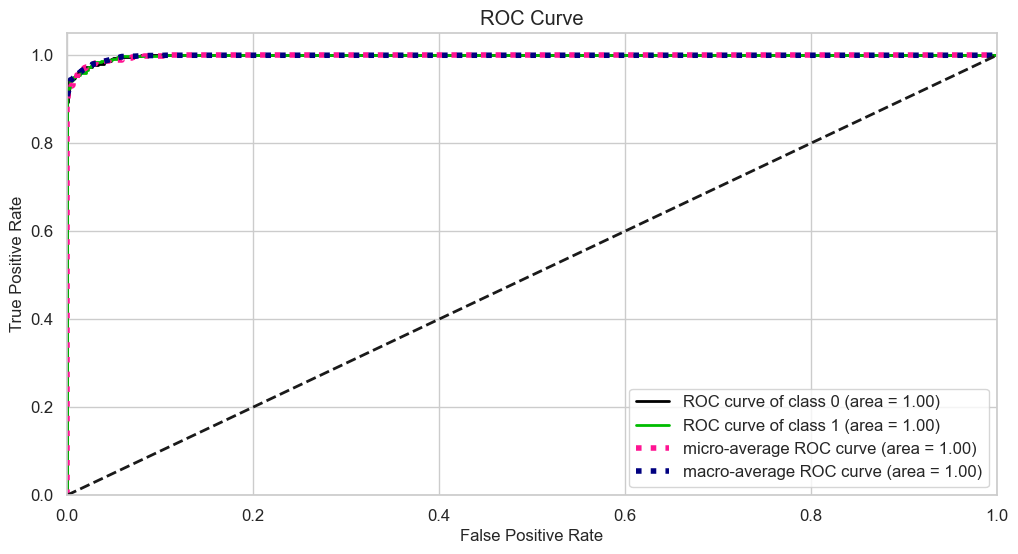

In [185]:
Y_test_probs = clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="ROC Curve", figsize=(12,6));

We can notice from the above plot that the area covered by the ROC AUC curve line of each class is more than 99% which is good

### Plotting the Precision-Recall Curve

c:\Users\abhij\Downloads\ADS_Project\ADS_Project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


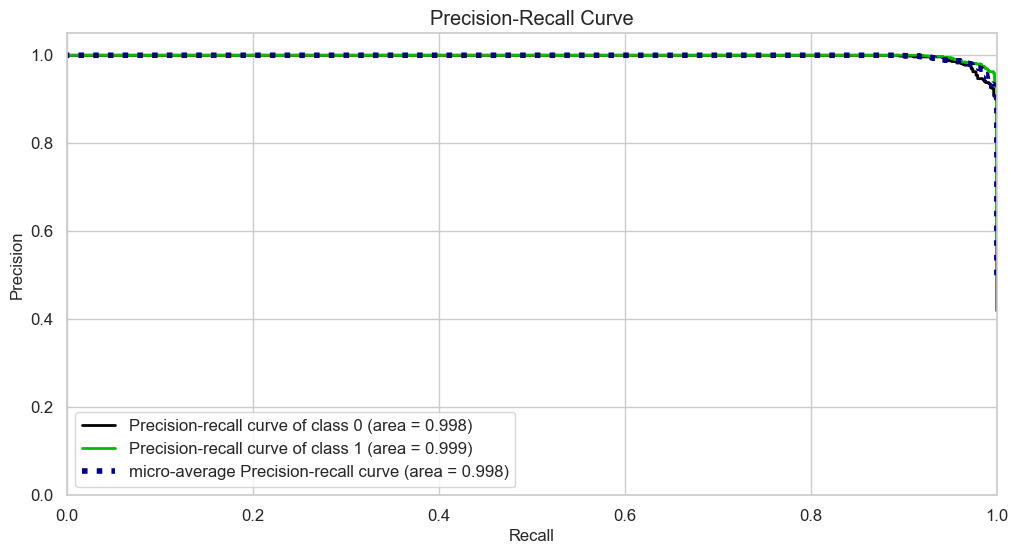

In [186]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs,
                       title="Precision-Recall Curve", figsize=(12,6));

We can see from the above plot that the area covered by the precision-recall curve line of each class is more than 99% which is good. 
We want a line of each class to cover more than 90% area so that we can be sure that our model is doing well predicting each class even in an imbalanced dataset situation.

Now using Cosine_similarity to recommend movies to the user

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Writing functions to give out similar movies as per the searched movie

In [188]:
def create_similarity(df):
    data = df
    # creating a count matrix
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(data['comb'])
    # creating a similarity score matrix
    similarity = cosine_similarity(count_matrix)
    return data,similarity

In [189]:
a, b = create_similarity(final_df)

In [190]:
def similarity(final_df, movie):
    # movie = request.form['name']
    rc = rcmd(final_df, movie)
    if type(rc)==type('string'):
        return rc
    else:
        m_str="---".join(rc)
        return m_str

In [191]:
def rcmd(data, m):
    
    data, similarity = create_similarity(data)
    


    i = data.loc[data['movie_title']==m].index[0]

    # i = final_df[final_df['movie_title'] == 'Avatar\xa0'].index[0]
    lst = list(enumerate(similarity[i]))
    lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
    lst = lst[1:5] # excluding first item since it is the requested movie itself
    l = []
    for i in range(len(lst)):
      a = lst[i][0]
      l.append(data['movie_title'][a])
    return l


In [192]:
similarity(final_df,"Avatar\xa0")

'Aliens\xa0---Mystery Men\xa0---Deep Rising\xa0---Dragonball: Evolution\xa0'

In [193]:
recommed_movies = rcmd(final_df,"Avatar\xa0" ) 

In [194]:
recommended_movies = []
for i in recommed_movies:
  recommended_movies.append(i.replace('\xa0',''))


In [195]:
api_key = '5492165c61b1a21c06eb3a3b578a6339'

## Testing the model 

#### Let us take the movie 'Avatar' as an example and check for the model's performance

In [196]:
m = 'Avatar'

In [197]:
#!pip install cinemagoer

In [198]:
from imdb import Cinemagoer

#### Here we find the IMDB ID of the movie

In [199]:
# creating instance of IMDb
ia = Cinemagoer()
search = ia.search_movie(m)
# movie = ia.search_movie('The Matrix')
# print(movie)
print(search)
imdb_id = 'tt' + str(search[0].movieID)
print(imdb_id)


[<Movie id:0499549[http] title:_Avatar (2009)_>, <Movie id:1630029[http] title:_Avatar: The Way of Water (2022)_>, <Movie id:0417299[http] title:_"Avatar: The Last Airbender" (2008) (2005)_>, <Movie id:1757678[http] title:_Avatar 3 (2024)_>, <Movie id:9018736[http] title:_"Avatar: The Last Airbender" (None)_>, <Movie id:5637536[http] title:_Avatar 5 (2028)_>, <Movie id:3095356[http] title:_Avatar 4 (2026)_>, <Movie id:10732794[http] title:_"The King's Avatar" (2019)_>, <Movie id:1133985[http] title:_Green Lantern (2011)_>, <Movie id:15275106[http] title:_"Avatar: Rise of Kyoshi Visual Novel" (2021)_>, <Movie id:0120347[http] title:_Tomorrow Never Dies (1997)_>, <Movie id:4727514[http] title:_The Last Avatar (2014)_>, <Movie id:6859260[http] title:_"The King's Avatar" (2017)_>, <Movie id:18259538[http] title:_Untitled Avatar: The Last Airbender Film 1 (2025)_>, <Movie id:11651768[http] title:_Avatara Purusha: Part 1 (2022)_>, <Movie id:1900832[http] title:_Avatar Spirits (2010)_>, <Movi

#### Checking for reviews from IMDB and classifying them as Good or Bad

In [200]:
sauce = urllib.request.urlopen('https://www.imdb.com/title/{}/reviews?ref_=tt_ov_rt'.format(imdb_id)).read()
soup = bs.BeautifulSoup(sauce,'lxml')
soup_result = soup.find_all("div",{"class":"text show-more__control"})

In [201]:
reviews_list = [] # list of reviews
reviews_status = [] # list of comments (good or bad)
for reviews in soup_result:
  if reviews.string:
    reviews_list.append(reviews.string)
    # passing the review to our model
    movie_review_list = np.array([reviews.string])
    movie_vector = vectorizer.transform(movie_review_list)
    pred = clf.predict(movie_vector)
    reviews_status.append('Good' if pred else 'Bad')

# combining reviews and comments into a dictionary
movie_reviews = {reviews_list[i]: reviews_status[i] for i in range(len(reviews_list))}  

In [202]:
from collections import Counter

## The result of Sentimental Analysis

In [203]:
count = Counter(movie_reviews.values())
print(count)
json_object = json.dumps(movie_reviews, indent =1) 
print(json_object)

Counter({'Good': 2, 'Bad': 1})
{
 "Hatts of to JAMES CAMERON for thinking and creating a vision like this. It takes a lotseof hardwork & research to build a whole new world. And there is a reason why this movie is still the no 1 movie in the world. I've never seen this kind of visuals in any other film. And this movie was made in 2009 that was an amazing achievement by the VFX creators & the director itself. You can easily get connected with the movie plot and the way the director has shown the Pandora world was just unbelievable. Cast of this film has done a fabulous job while performing so well and get into the character that not a single one will disappoint. Emotional scenes are so powerful that you feel the characters and their pain for what their suffering. Visual Effects makes this movie so powerful that every creature and big scenery scenes looks real. That's why it has re-released once again to feel the same experience. Don't miss this one on the big screen if you haven't seen 

### The top 3 movie recommendations

In [204]:
for i in recommended_movies:
  print(i.replace("/xa0",""))

Aliens
Mystery Men
Deep Rising
Dragonball: Evolution


Now implementing a CNN model for review sentiment analysis to check if we can get a better model.

## Importing packages for CNN model

In [205]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

from tensorflow.keras.preprocessing import sequence
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, MaxPool1D, Dropout, SimpleRNN, LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence
import numpy as np
import string
import re

Finally looking at training dataframe

In [206]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much..."
6916,0,Ok brokeback mountain is such a horrible movie.


Converting the dataset into lists for reviews and sentiment

In [207]:
text = dataset.Comments.tolist()
label = dataset.Reviews.tolist()

In [208]:
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=1)

In [209]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

Cleaning, Tokenizing and Padding before training the model for CNN

In [210]:
X_train_clean = []
X_test_clean = []
clean = re.compile(r'<[^>]+>')
for i, test in enumerate(X_train):
    tmp_text = test.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    X_train_clean.append(tmp_text)

for i, test in enumerate(X_test):
    tmp_text = test.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    X_test_clean.append(tmp_text)

X_train_clean = np.array(X_train_clean)
X_test_clean = np.array(X_test_clean)

X_train = X_train_clean
X_test = X_test_clean

In [211]:
top_words = 40000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [212]:
max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_words, padding='post')

In [213]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [214]:
X_train.shape

(5534, 100)

### Designing the CNN model

In [215]:
model = Sequential()
model.add(Embedding(20000,32, input_length=100))
model.add(Conv1D(256, 3, activation='relu', padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [216]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           640000    
                                                                 
 conv1d (Conv1D)             (None, 100, 256)          24832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 256)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 128)           98432     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 25, 128)          0         
 1D)                                                    

In [217]:
history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
44/44 - 5s - loss: 0.3992 - accuracy: 0.7732 - val_loss: 0.0648 - val_accuracy: 0.9819 - 5s/epoch - 107ms/step
Epoch 2/20
44/44 - 3s - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0374 - val_accuracy: 0.9863 - 3s/epoch - 74ms/step
Epoch 3/20
44/44 - 3s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0306 - val_accuracy: 0.9892 - 3s/epoch - 69ms/step
Epoch 4/20
44/44 - 3s - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0273 - val_accuracy: 0.9892 - 3s/epoch - 74ms/step
Epoch 5/20
44/44 - 3s - loss: 3.7016e-04 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9892 - 3s/epoch - 68ms/step
Epoch 6/20
44/44 - 3s - loss: 1.8493e-04 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9906 - 3s/epoch - 72ms/step
Epoch 7/20
44/44 - 3s - loss: 1.0892e-04 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 0.9899 - 3s/epoch - 77ms/step
Epoch 8/20
44/44 - 3s - loss: 7.5127e-05 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9913 - 3s/epoch - 76ms/step
Epoch 9/20
44/4

In [218]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(X_test,y_test)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
44/44 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9899
{'loss': 0.02777162939310074, 'accuracy': 0.9898843765258789}


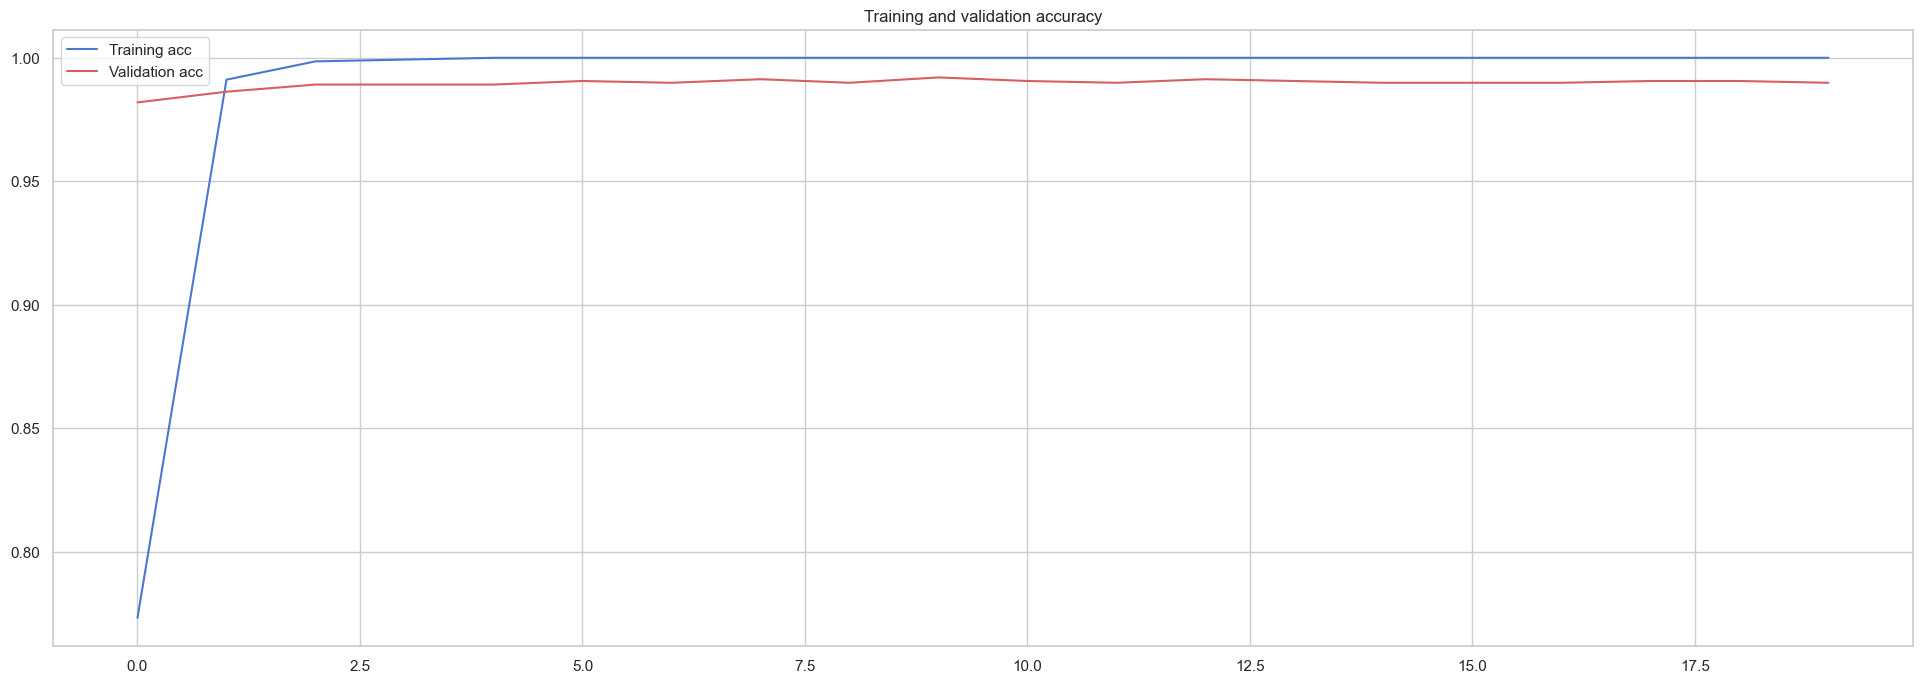

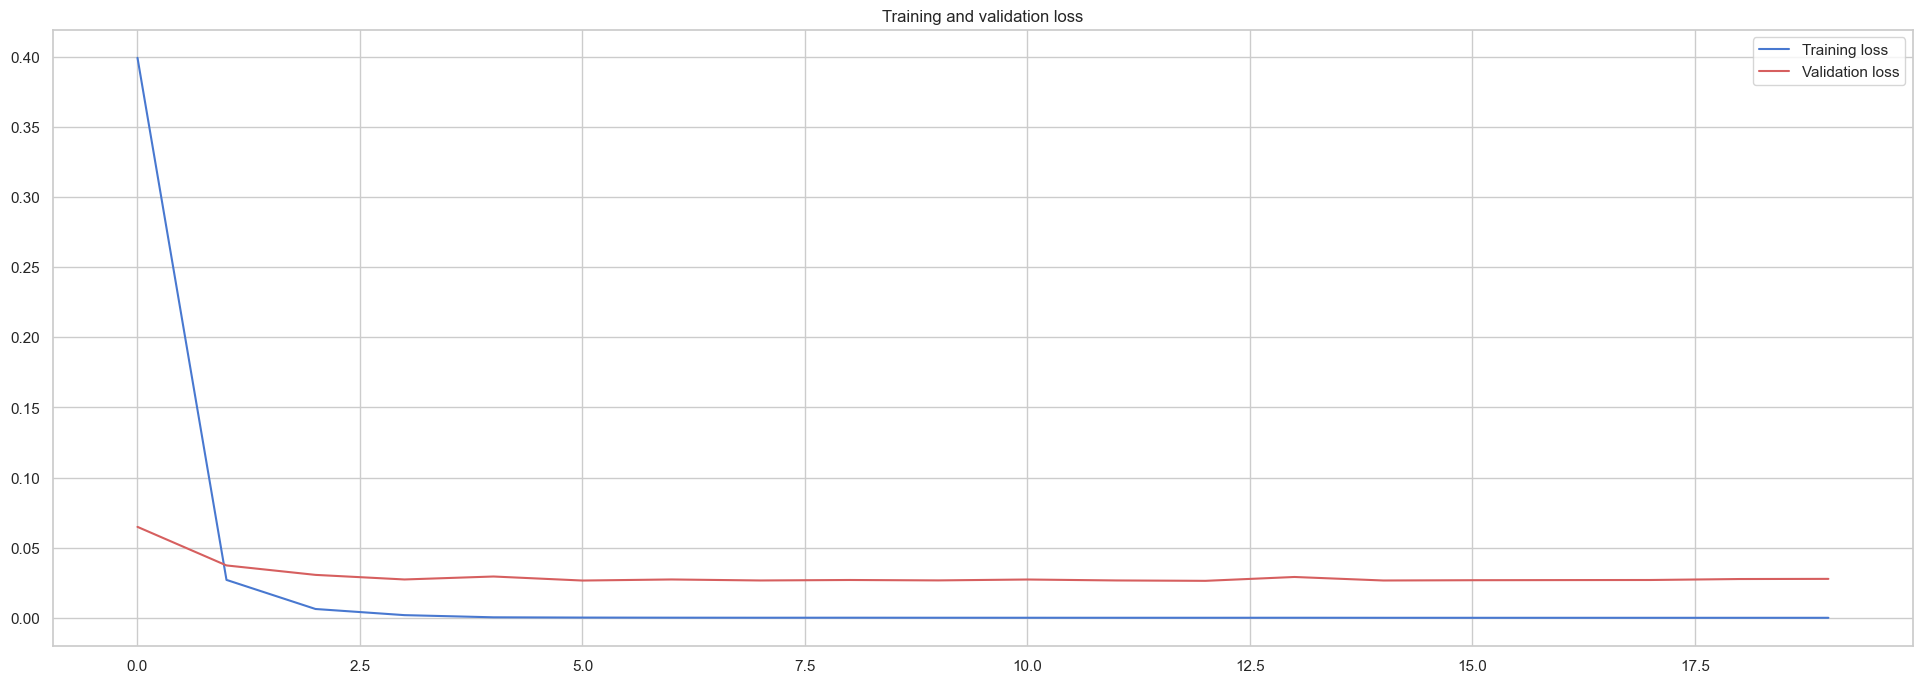

In [219]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [220]:
for reviews in soup_result:
  if reviews.string:
    reviews_list.append(reviews.string)

In [221]:
moviewrev_clean = []
reviews_status =[]
clean = re.compile(r'<[^>]+>')
for test in reviews_list:
    tmp_text = test.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    moviewrev_clean.append(tmp_text)
    movie_tokened = tokenizer.texts_to_sequences(moviewrev_clean)
    movie_pad = sequence.pad_sequences(movie_tokened, maxlen=max_words, padding='post')
pred = history.model.predict(movie_pad)
for i in pred:
    reviews_status.append('Good' if i else 'Bad')

movie_reviews = {moviewrev_clean[i]: reviews_status[i] for i in range(len(reviews_list))}  

1/1 [==============================] - 0s 112ms/step


In [222]:
df = pd.DataFrame([movie_reviews],index=[0])

In [223]:
df.head

<bound method NDFrame.head of   hatts of to james cameron for thinking and creating a vision like this  it takes a lotseof hardwork   research to build a whole new world  and there is a reason why this movie is still the no 1 movie in the world  i ve never seen this kind of visuals in any other film  and this movie was made in 2009 that was an amazing achievement by the vfx creators   the director itself  you can easily get connected with the movie plot and the way the director has shown the pandora world was just unbelievable  cast of this film has done a fabulous job while performing so well and get into the character that not a single one will disappoint  emotional scenes are so powerful that you feel the characters and their pain for what their suffering  visual effects makes this movie so powerful that every creature and big scenery scenes looks real  that s why it has re released once again to feel the same experience  don t miss this one on the big screen if you haven t seen it 

### LSTM-CNN model

In [224]:
LSTM_CNNmodel = Sequential()
LSTM_CNNmodel.add(Embedding(20000,32, input_length=100))
LSTM_CNNmodel.add(Conv1D(256, 3, activation='relu', input_shape=(178, 1), padding='same'))
LSTM_CNNmodel.add(MaxPool1D(2))
LSTM_CNNmodel.add(Dropout(0.2))
LSTM_CNNmodel.add(Conv1D(128, 3, activation='relu', padding='same'))
LSTM_CNNmodel.add(MaxPool1D(2))
LSTM_CNNmodel.add(Dropout(0.2))
LSTM_CNNmodel.add(LSTM(64, return_sequences=True))
LSTM_CNNmodel.add(LSTM(32))
LSTM_CNNmodel.add(Flatten())
LSTM_CNNmodel.add(Dense(250, activation='relu'))
LSTM_CNNmodel.add(Dropout(0.2))
LSTM_CNNmodel.add(Dense(1, activation='sigmoid'))
LSTM_CNNmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [225]:
model1=LSTM_CNNmodel.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
44/44 - 9s - loss: 0.6796 - accuracy: 0.5743 - val_loss: 0.6001 - val_accuracy: 0.5542 - 9s/epoch - 197ms/step
Epoch 2/20
44/44 - 4s - loss: 0.1721 - accuracy: 0.9496 - val_loss: 0.1195 - val_accuracy: 0.9754 - 4s/epoch - 87ms/step
Epoch 3/20
44/44 - 4s - loss: 0.0671 - accuracy: 0.9877 - val_loss: 0.0863 - val_accuracy: 0.9841 - 4s/epoch - 98ms/step
Epoch 4/20
44/44 - 5s - loss: 0.0438 - accuracy: 0.9926 - val_loss: 0.0886 - val_accuracy: 0.9841 - 5s/epoch - 118ms/step
Epoch 5/20
44/44 - 5s - loss: 0.0333 - accuracy: 0.9948 - val_loss: 0.1046 - val_accuracy: 0.9790 - 5s/epoch - 111ms/step
Epoch 6/20
44/44 - 4s - loss: 0.0772 - accuracy: 0.9852 - val_loss: 0.0852 - val_accuracy: 0.9877 - 4s/epoch - 99ms/step
Epoch 7/20
44/44 - 5s - loss: 0.0268 - accuracy: 0.9962 - val_loss: 0.0485 - val_accuracy: 0.9921 - 5s/epoch - 112ms/step
Epoch 8/20
44/44 - 4s - loss: 0.0046 - accuracy: 0.9996 - val_loss: 0.0552 - val_accuracy: 0.9921 - 4s/epoch - 100ms/step
Epoch 9/20
44/44 - 4s - los

In [226]:
print("Evaluate Model Performance on Test set")
result = LSTM_CNNmodel.evaluate(X_test,y_test)
print(dict(zip(LSTM_CNNmodel.metrics_names, result)))

Evaluate Model Performance on Test set
44/44 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 0.9935
{'loss': 0.042058199644088745, 'accuracy': 0.9934971332550049}


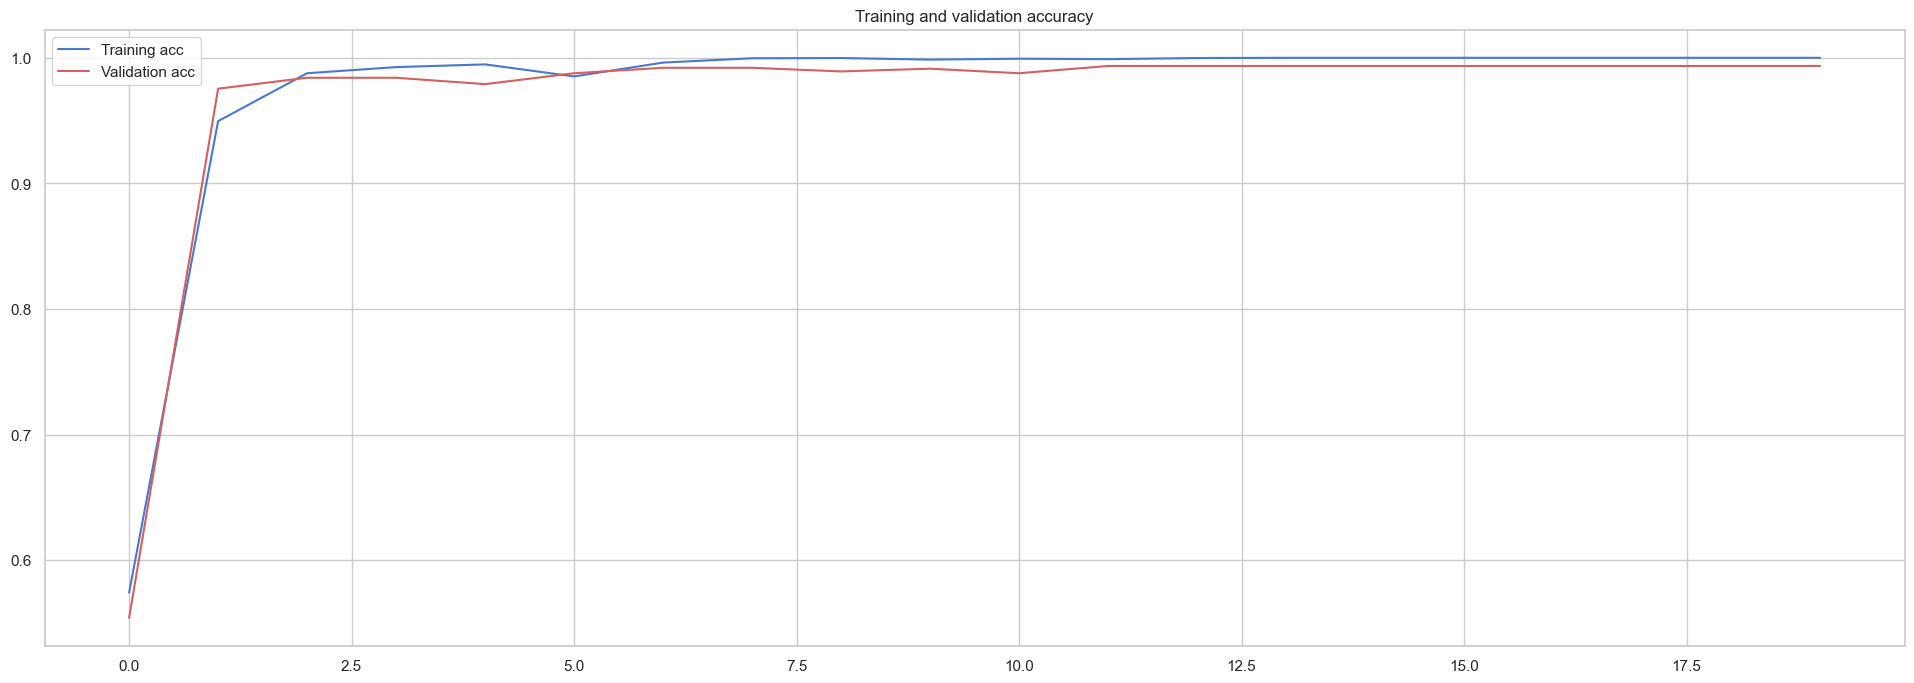

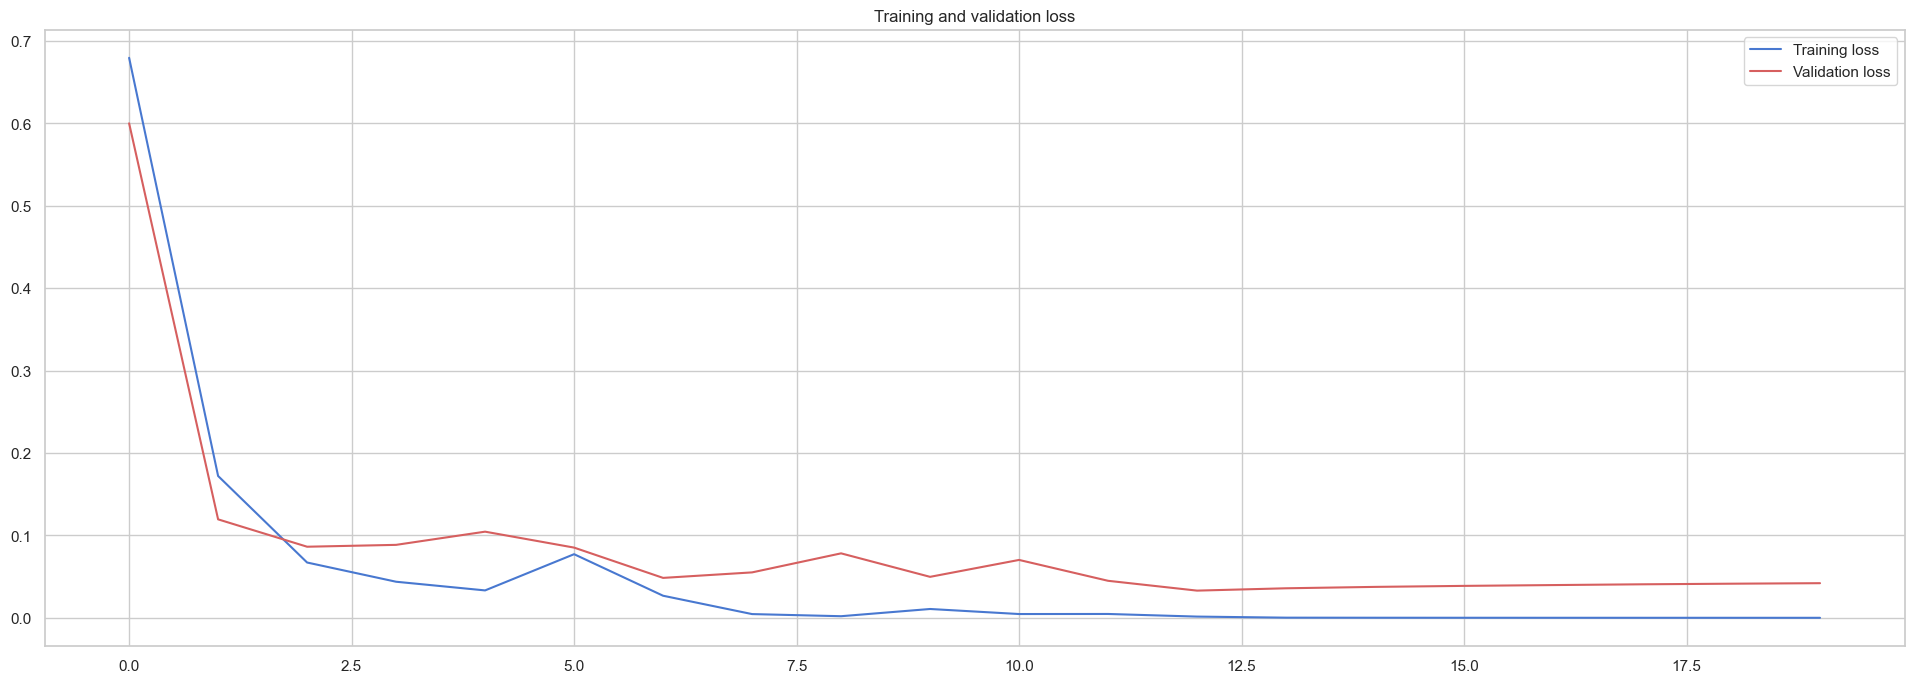

In [227]:
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']
loss = model1.history['loss']
val_loss = model1.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [228]:
for reviews in soup_result:
  if reviews.string:
    reviews_list.append(reviews.string)

In [229]:
moviewrev_clean = []
reviews_status =[]
clean = re.compile(r'<[^>]+>')
for test in reviews_list:
    tmp_text = test.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    moviewrev_clean.append(tmp_text)
    movie_tokened = tokenizer.texts_to_sequences(moviewrev_clean)
    movie_pad = sequence.pad_sequences(movie_tokened, maxlen=max_words, padding='post')
pred = model1.model.predict(movie_pad)
for i in pred:
    reviews_status.append('Good' if i else 'Bad')

movie_reviews = {moviewrev_clean[i]: reviews_status[i] for i in range(len(reviews_list))}  


1/1 [==============================] - 1s 819ms/step


In [230]:
df = pd.DataFrame([movie_reviews],index=[0])

In [231]:
df.head

<bound method NDFrame.head of   hatts of to james cameron for thinking and creating a vision like this  it takes a lotseof hardwork   research to build a whole new world  and there is a reason why this movie is still the no 1 movie in the world  i ve never seen this kind of visuals in any other film  and this movie was made in 2009 that was an amazing achievement by the vfx creators   the director itself  you can easily get connected with the movie plot and the way the director has shown the pandora world was just unbelievable  cast of this film has done a fabulous job while performing so well and get into the character that not a single one will disappoint  emotional scenes are so powerful that you feel the characters and their pain for what their suffering  visual effects makes this movie so powerful that every creature and big scenery scenes looks real  that s why it has re released once again to feel the same experience  don t miss this one on the big screen if you haven t seen it 

## Finally we have a great system which gives us sentiment analysis of the scraped movie reviews and gives us movie recommendations based on the entered movie using Content based filtering.

## But now we take it further with Collaborative filtering which addresses some limitations of content based filtering.

### for this we will take past data of users review ratings to recommend movies for the user.

In [238]:
df = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df['Rating'] = df['Rating'].astype(float)
df.index = np.arange(0,len(df))

In [239]:
# df2 = pd.read_csv('combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df3 = pd.read_csv('combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df4 = pd.read_csv('combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])


# df2['Rating'] = df2['Rating'].astype(float)
# df3['Rating'] = df3['Rating'].astype(float)
# df4['Rating'] = df4['Rating'].astype(float)
# df = df1
# df = df1.append(df2)
# df = df.append(df3)
# df = df.append(df4)

preparing the data with relevant format and using important features and dropping the rest

In [240]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [241]:
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::5000000, :])

-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


In [242]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0


In [243]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::5000000, :])

Original Shape: (24053764, 3)
After Trim Shape: (17337458, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
696        712664     5.0         3
6932490   1299309     5.0      1384
13860273   400155     3.0      2660
20766530   466962     4.0      3923


In [244]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [245]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1")
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name Unnamed: 3 Unnamed: 4  \
Movie_Id                                                               
1         2003.0               Dinosaur Planet        NaN        NaN   
2         2004.0    Isle of Man TT 2004 Review        NaN        NaN   
3         1997.0                     Character        NaN        NaN   
4         1994.0  Paula Abdul's Get Up & Dance        NaN        NaN   
5         2004.0      The Rise and Fall of ECW        NaN        NaN   
6         1997.0                          Sick        NaN        NaN   
7         1992.0                         8 Man        NaN        NaN   
8         2004.0    What the #$*! Do We Know!?        NaN        NaN   
9         1991.0      Class of Nuke 'Em High 2        NaN        NaN   
10        2001.0                       Fighter        NaN        NaN   

         Unnamed: 5  
Movie_Id             
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5  

In [246]:
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on Pearsons'R correlation - ")
    i = int(df_title.index[df_title['Name'] == movie_title][0])
    target = df_p[i]
    similar_to_target = df_p.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title).join(df_movie_summary)[['PearsonR', 'Name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))

In [247]:
recommend("Inu-Yasha", 0)

For movie (Inu-Yasha)
- Top 10 movies recommended based on Pearsons'R correlation - 
 PearsonR                               Name  count     mean
 1.000000                          Inu-Yasha   1883 4.554434
 0.923685                 Foyle's War: Set 2   2475 4.249293
 0.906828              Love in the Afternoon   2370 3.540506
 0.899746 Stoked: The Rise and Fall of Gator   2095 3.422912
 0.883783                       Regular Guys   1931 3.372864
 0.877944                           Together   3958 3.889843
 0.860688                 Spencer's Mountain   2624 3.848323
 0.854868                         Live Flesh   6072 3.600626
 0.839446                        Fever Pitch   2948 2.978290
 0.836660                 Cries and Whispers   2041 3.587457


In [248]:
recommend("X2: X-Men United", 0)

For movie (X2: X-Men United)
- Top 10 movies recommended based on Pearsons'R correlation - 
 PearsonR                                                  Name  count     mean
 1.000000                                      X2: X-Men United  98720 3.932202
 0.384550                              Batman Beyond: The Movie   2614 3.726855
 0.375967                                        Justice League   3591 3.710944
 0.361393                      Justice League: Justice on Trial   2961 3.718001
 0.338025                    Batman Beyond: Return of the Joker   3704 3.604752
 0.335256                                         Batman Begins  54922 4.236699
 0.328229                          Batman: Mask of the Phantasm   2823 3.767977
 0.327040 Batman: The Animated Series: Tales of the Dark Knight   2432 3.583059
 0.316666                       Dragon Ball Z: Super Android 13   2426 3.428689
 0.316166                              Mortal Kombat: The Movie   7633 3.165466
